<a href="https://colab.research.google.com/github/Nikkuchan/CpE-AIML/blob/main/58090_LabNo06_Wagler/58090_LabNo06_Wagler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 05.2: Perceptrons, Gradient Descent, and Backpropagation
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$



## Laboratory Activity
1. For the laboratory activity, obtain a dataset of your liking from a data source. Explain the purpose of the dataset and mention any publication if it is obtained from the source. Provide a needs statement and significance for the dataset.

2. Identify an algorithm or method in performing a single or multiple variable classification using the Perceptron alogrithm. 

3. You must re-create your Perceptron algorithm with Gradient Descent and Backpropagation using your own code in a separate Google Colab. However, you are required to observe the following:

>* Enforce object-oriented programming by implementing at least two of the pillars of OOP in the entirety of the solution.
* Dedicated functions for training, predicting, and evaluating the solution.
* A DataFrame of the metrics of the solution
* A visualization of the solution’s results.


NOTES: https://github.com/dyjdlopez/fund-of-aiml/blob/main/activities/05%20-%20Classification/fund_aiml_05v1_lec2_2021.ipynb 


### **Purpose of the Dataset**

The dataset uploaded by Caner Dabakoglu in Kaggle in 2019 aims to classify if patients have heart disease or not according to the features presented on the dataset. The purpose of this dataset is to try to predict if a patient has heart disease or not

### **Needs statement**

There are many factors to that come into play when knowing if patients have heart disease or not. Some risk factors cannot be controlled such as the age and family history. But there are also factors that can increase the likelihood of getting a heart disease e.g. High Blood Pressure and High Cholesterol. Knowing these conditions will help them know if they have a high chance of getting one. Predicting the likelihood of it happening can help them take the necessary steps in lowering the risks by changing certain factors that can be controlled in their lifestyle.

### **Significance**

The significance of this dataset is to know if a person has heart disease or not. Knowing early on if a patient is prone to heart disease can help with stopping or mitigating the problems that the heart disease can cause. Heart disease is rampant in Americans wherein almost half of the population (47%) have at least 1 risk factors for heart disease such as high cholesterol, high blood pressure, and smoking.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import os

In [ ]:
heartDisease = pd.read_csv("/content/heart_disease.csv")
y = heartDisease.target.values
x_data = heartDisease.drop(['target'], axis = 1)

In [ ]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)
x_train,y_train  = x_train.T,y_train.T
x_test,y_test = x_test.T,y_test.T

In [ ]:
def initialize(dimension):
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [ ]:
def sigmoid(z):  
  sig = 1/(1+ np.exp(-z))
  return sig

In [ ]:
def propagation(weight,bias,x_train,y_train):
    # FORWARD PROPAGATION 
    sig = sigmoid(np.dot(weight.T,x_train) + bias) 
    loss = -(y_train*np.log(sig) + (1-y_train)*np.log(1-sig))
    cost = np.sum(loss) / x_train.shape[1]
    # BACKWARD PROPAGATION
    dw = np.dot(x_train,((sig-y_train).T))/x_train.shape[1]
    db = np.sum(sig-y_train)/x_train.shape[1]
    grads = {"Derivative Weight" : dw,
             "Derivative Bias" : db}
    return cost,grads

In [ ]:
def optimize(weight,bias,x_train,y_train,learningRate,iteration, print_cost = True) :
    costs = []
    index = []
    
    for i in range(iteration):
        # Cost and gradient calculation 
        cost,grads = propagation(weight,bias,x_train,y_train)
        # Retrieve derivatives from grads
        weight = weight - learningRate * grads["Derivative Weight"]   
        bias = bias - learningRate * grads["Derivative Bias"]
        costs.append(cost)
        index.append(i)

        if print_cost and i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costs)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, grads

In [ ]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    sig = sigmoid(z)
    preds = np.zeros((1,x_test.shape[1]))
    for i in range(sig.shape[1]):
        if sig[0,i] <= 0.5:
            preds[0,i] = 0
        else:
            preds[0,i] = 1
    return preds

In [ ]:
def model(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    parameters, gradients = optimize(weight,bias,x_train,y_train,learningRate,iteration)
    predsTrain = predict(parameters["weight"],parameters["bias"],x_train)
    predsTest = predict(parameters["weight"],parameters["bias"],x_test)
    print(" Train Accuracy: {:.2f}%".format((100 - np.mean(np.abs(predsTrain - y_train))*100)))
    print(" Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(predsTest - y_test))*100)))
    

Cost after iteration 0: 0.694856
Cost after iteration 10: 0.382520
Cost after iteration 20: 0.329160
Cost after iteration 30: 0.297433
Cost after iteration 40: 0.273495
Cost after iteration 50: 0.254232
Cost after iteration 60: 0.238306
Cost after iteration 70: 0.224908
Cost after iteration 80: 0.213476
Cost after iteration 90: 0.203598
Cost after iteration 100: 0.194966
Cost after iteration 110: 0.187347
Cost after iteration 120: 0.180559
Cost after iteration 130: 0.174463
Cost after iteration 140: 0.168948
Cost after iteration 150: 0.163926
Cost after iteration 160: 0.159326
Cost after iteration 170: 0.155091
Cost after iteration 180: 0.151173
Cost after iteration 190: 0.147534
Cost after iteration 200: 0.144140
Cost after iteration 210: 0.140964
Cost after iteration 220: 0.137982
Cost after iteration 230: 0.135176
Cost after iteration 240: 0.132527
Cost after iteration 250: 0.130021
Cost after iteration 260: 0.127645
Cost after iteration 270: 0.125388
Cost after iteration 280: 0.123

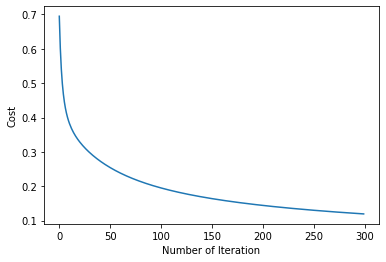

 Train Accuracy: 96.28%
 Test Accuracy: 98.36%


In [ ]:
neuronModel = model(x_train,y_train,x_test,y_test,1,300)

Text(0.5, 1.0, 'Confusion Matrix')

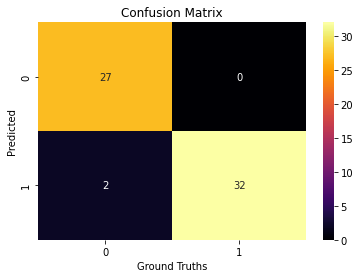

In [ ]:
logiReg = LogisticRegression()
logiReg.fit(x_train.T,y_train.T)
sigmoid_lr = logiReg.predict(x_test.T)
c_matrix = confusion_matrix(y_test,sigmoid_lr)
sns.heatmap(c_matrix,annot=True,cmap="inferno")
plt.xlabel("Ground Truths")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")